In [2]:
#Imports

import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)
import matplotlib.pyplot as plt

In [3]:
#Data 1222

E=180 #GPa
ν=0.4 #[-] 
a=float(input("a=")) #mm (25)
b=float(input("b=")) #mm (75)
c=float(input("c=")) #mm (120)
p=float(input("p=")) #MPa (350)
t=float(input("t=")) #mm (6)

#Change to SI

E=E*10**9
a=a/1000
b=b/1000
c=c/1000
t=t/1000
p=p*10**6

In [4]:
#Eredő elmozdulások meghatározása

print("Eredő elmozdulások meghatározása:")

#Symbols

ξ,η=sp.symbols("ξ,η")

#Forma függvények

N_1=1/4*(1-ξ)*(1-η)
N_2=1/4*(1+ξ)*(1-η)
N_3=1/4*(1+ξ)*(1+η)
N_4=1/4*(1-ξ)*(1+η)

N=[N_1,N_2,N_3,N_4]

#Trafó

def Jacobian(x_vec,y_vec):
    J_11=0
    J_12=0
    J_21=0
    J_22=0
    for i in range(len(N)):
        J_11+=sp.diff(N[i],ξ)*x_vec[i]
        J_12+=sp.diff(N[i],ξ)*y_vec[i]
        J_21+=sp.diff(N[i],η)*x_vec[i]
        J_22+=sp.diff(N[i],η)*y_vec[i]
    J=sp.Matrix([[J_11,J_12],[J_21,J_22]])
    return J

print("\nAz elemek Jacobi Mátrixai:")

#1.elem

x_1=[0,c/3,c/3,0]
y_1=[0,0,b-a,b]

#x_K=[0,100,100,0]
#y_K=[0,0,100,200]

J_1=Jacobian(x_1,y_1)

print("\nJ_1=")
display(J_1)

#2.elem

x_2=[c/3,c-a,c,0]
y_2=[b-a,b-a,b,b]

J_2=Jacobian(x_2,y_2)

print("\nJ_2=")
display(J_2)

#3.elem

x_3=[c-a,c,c,c-a]
y_3=[0,0,b,b-a]

J_3=Jacobian(x_3,y_3)

print("\nJ_3=")
display(J_3)

Eredő elmozdulások meghatározása:

Az elemek Jacobi Mátrixai:

J_1=


⎡0.02  -0.00625⋅η - 0.00625⎤
⎢                          ⎥
⎣ 0    0.03125 - 0.00625⋅ξ ⎦


J_2=


⎡0.01625⋅η + 0.04375    0   ⎤
⎢                           ⎥
⎣0.01625⋅ξ - 0.00375  0.0125⎦


J_3=


⎡0.0125  0.00625⋅η + 0.00625⎤
⎢                           ⎥
⎣  0     0.00625⋅ξ + 0.03125⎦


Formafüggvények deriváltjai:

B mátrixok értékei:

D=


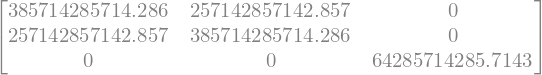

In [5]:
#Formafüggvények deriváltjai

print("\nFormafüggvények deriváltjai:")

def N_dx_dy(N_i,J_i):
    N_i_dξ_dη=sp.Matrix([[sp.diff(N_i,ξ)], [sp.diff(N_i,η)]])
    N_i_dx_dy=J_i.inv()*N_i_dξ_dη
    return  N_i_dx_dy


J_tensor=[J_1,J_2,J_3]

N_i_j_dx=sp.Matrix(np.zeros(12))
N_i_j_dy=sp.Matrix(np.zeros(12))

for j in range(len(J_tensor)):
    for i in range(len(N)):
        N_i_dx_dy=N_dx_dy(N[i],J_tensor[j])
        N_i_j_dx[i+4*j]=N_i_dx_dy[0]
        N_i_j_dy[i+4*j]=N_i_dx_dy[1]

#display(N_i_j_dx)
#display(N_i_j_dy) #sztem ezek jok

def sub_N_i(N_i_di,n):
    N_di=sp.Matrix(np.zeros(4))
    for i in range(len(N_di)):
        N_di[i]=N_i_di[i+(n-1)*4]
    
    return N_di
    
#Subvectors

N_dx_1=sub_N_i(N_i_j_dx,1)
N_dy_1=sub_N_i(N_i_j_dy,1)

N_dx_2=sub_N_i(N_i_j_dx,2)
N_dy_2=sub_N_i(N_i_j_dy,2)

N_dx_3=sub_N_i(N_i_j_dx,3)
N_dy_3=sub_N_i(N_i_j_dy,3)

#B mátrixok

print("\nB mátrixok értékei:")

def B_i(N_dx,N_dy):
    B=sp.Matrix([[N_dx[0],0,N_dx[1],0,N_dx[2],0,N_dx[3],0],
                [0,N_dy[0],0,N_dy[1],0,N_dy[2],0,N_dy[3]],
                [N_dy[0],N_dx[0],N_dy[1],N_dx[1],N_dy[2],N_dx[2],N_dy[3],N_dx[3]]])
    return B

#Elemenként numerikusan

B_1=B_i(N_dx_1,N_dy_1)
B_2=B_i(N_dx_2,N_dy_2)
B_3=B_i(N_dx_3,N_dy_3)

#D mátrix

D=E/((1+ν)*(1-2*ν))*sp.Matrix([[1-ν,ν,0],[ν,1-ν,0],[0,0,(1-2*ν)/2]])
print("\nD=")
display(D)

Merevségi mátrixok meghatározása:

K_1=


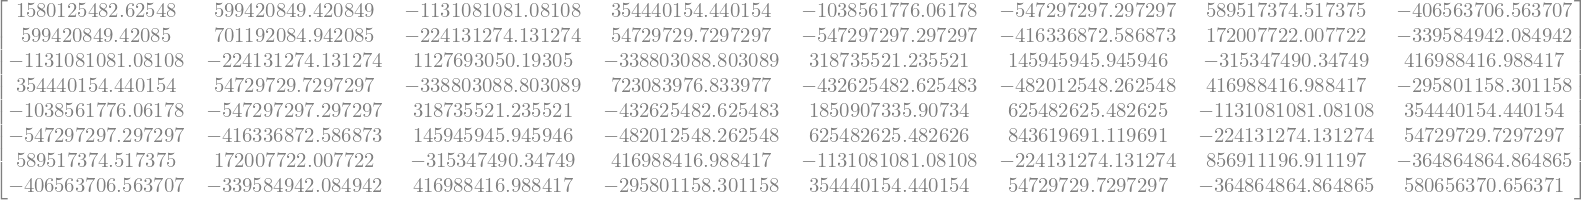

K_2=


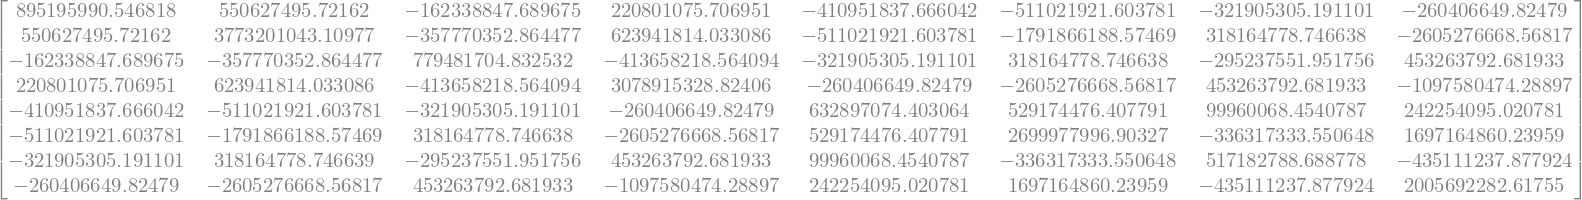

K_3=


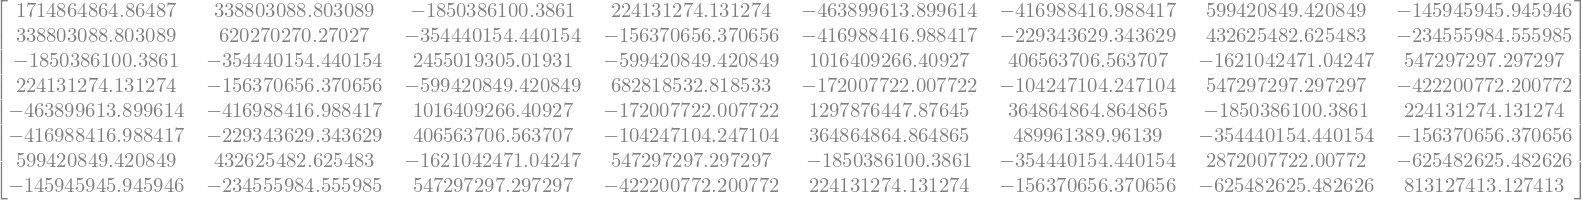


Globális merevségi mátrix meghatározása:

K_glob=


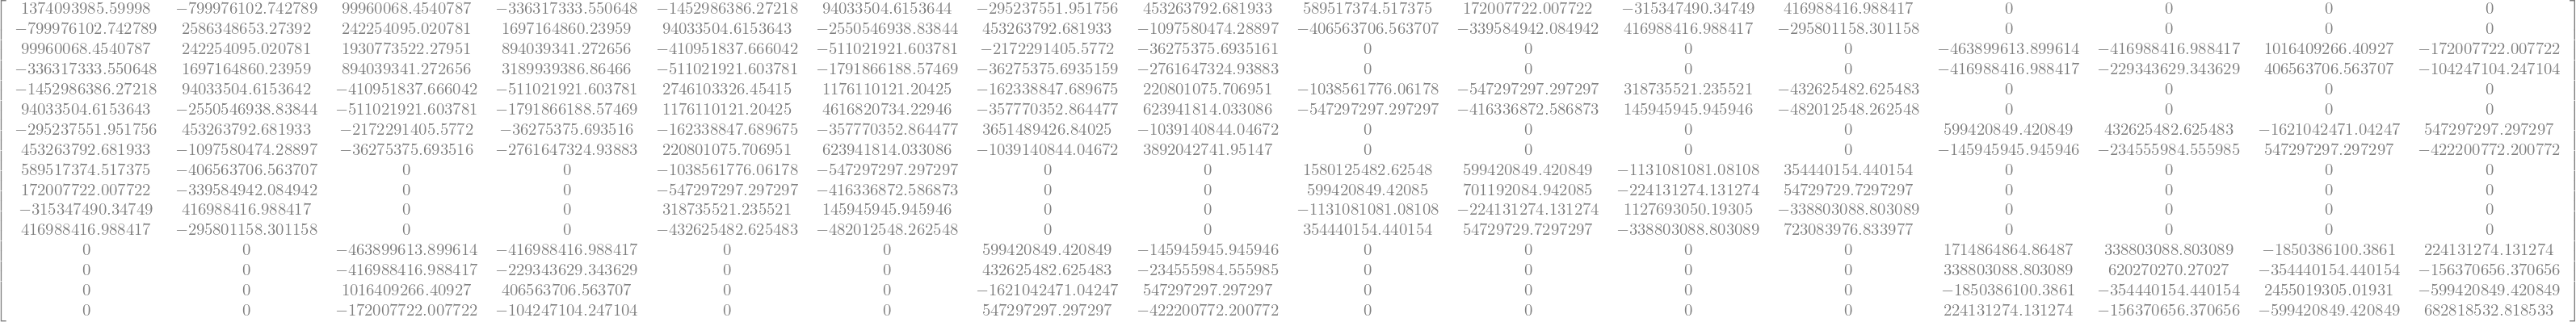

In [9]:
#Merevségi mátrixok meghatározása

print("Merevségi mátrixok meghatározása:")

#K mátrixok

def K_i(B_i,J_i):
    F_i=Transpose(B_i)*D*B_i*J_i.det()*t
    K_i=F_i.subs({ξ:-1/np.sqrt(3), η:-1/np.sqrt(3)})+F_i.subs({ξ:1/np.sqrt(3), η:-1/np.sqrt(3)})+F_i.subs({ξ:1/np.sqrt(3), η:1/np.sqrt(3)})+F_i.subs({ξ:-1/np.sqrt(3), η:1/np.sqrt(3)})
    return K_i

#Elemenként

K_1=K_i(B_1,J_1)
print("\nK_1=")
display(K_1)

K_2=K_i(B_2,J_2)
print("K_2=")
display(K_2)

K_3=K_i(B_3,J_3)
print("K_3=")
display(K_3)


#Globális merevségi mátrix

print("\nGlobális merevségi mátrix meghatározása:")

ecs = sp.Matrix([[5,6,3,1],[3,4,2,1],[7,8,2,4]])

eDOF1 = [2*ecs[0,0]-1, 2*ecs[0,0], 2*ecs[0,1]-1, 2*ecs[0,1], 2*ecs[0,2]-1, 2*ecs[0,2], 2*ecs[0,3]-1, 2*ecs[0,3]]
eDOF2 = [2*ecs[1,0]-1, 2*ecs[1,0], 2*ecs[1,1]-1, 2*ecs[1,1], 2*ecs[1,2]-1, 2*ecs[1,2], 2*ecs[1,3]-1, 2*ecs[1,3]]
eDOF3 = [2*ecs[2,0]-1, 2*ecs[2,0], 2*ecs[2,1]-1, 2*ecs[2,1], 2*ecs[2,2]-1, 2*ecs[2,2], 2*ecs[2,3]-1, 2*ecs[2,3]]


def ExtMatrix(mx, rows, size):
    n = len(rows)
    Mx = np.zeros((size,size))
    for i in range(n):
        for j in range(n):
            Mx[rows[i]-1,rows[j]-1] = mx[i,j]
    return Mx

K_glob = sp.Matrix(ExtMatrix(K_1, eDOF1, 16) + ExtMatrix(K_2, eDOF2, 16) + ExtMatrix(K_3, eDOF3, 16))

print("\nK_glob=")

display(K_glob)